In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:
penguins = sns.load_dataset('penguins')
penguins


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
penguins.dropna(inplace = True) # Drop all NaN (Not a Number) values in the data. By using (inplace = True) argument,
                                # we tell the pyton to drop the values from the original dataset.
print('Done!')

Done!


In [5]:
penguins.shape

(333, 7)

In [6]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [7]:
sns.set_style('darkgrid')

In [8]:
penguins.flipper_length_mm.value_counts()

flipper_length_mm
190.0    21
195.0    17
187.0    16
193.0    14
210.0    14
191.0    13
215.0    12
197.0    10
196.0    10
185.0     9
220.0     8
198.0     8
208.0     8
230.0     7
181.0     7
189.0     7
192.0     7
184.0     7
212.0     7
213.0     6
201.0     6
216.0     6
222.0     6
186.0     6
199.0     6
188.0     6
209.0     5
194.0     5
214.0     5
203.0     5
219.0     5
221.0     5
218.0     5
217.0     5
225.0     4
178.0     4
200.0     4
228.0     4
202.0     4
180.0     4
182.0     3
224.0     3
205.0     3
183.0     2
211.0     2
207.0     2
229.0     2
223.0     2
174.0     1
172.0     1
206.0     1
231.0     1
176.0     1
226.0     1
Name: count, dtype: int64

#### Univariate histplot

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

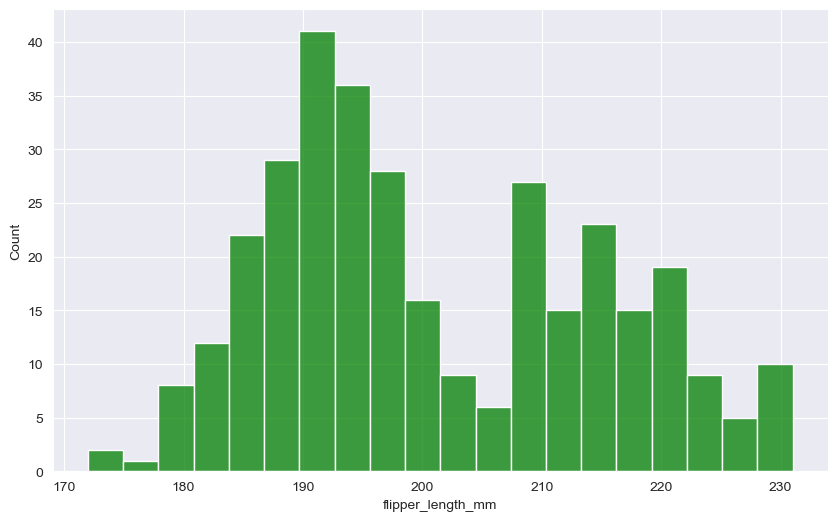

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(penguins.flipper_length_mm, color = 'g', bins = 20)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

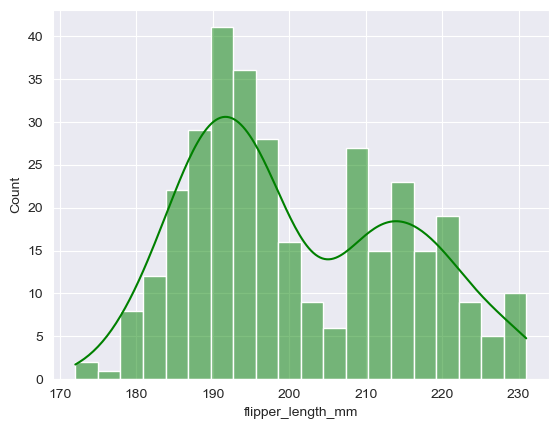

In [10]:
# We can kde also (Smooth curve)
sns.histplot(penguins.flipper_length_mm, color = 'g', bins = 20, kde = True)

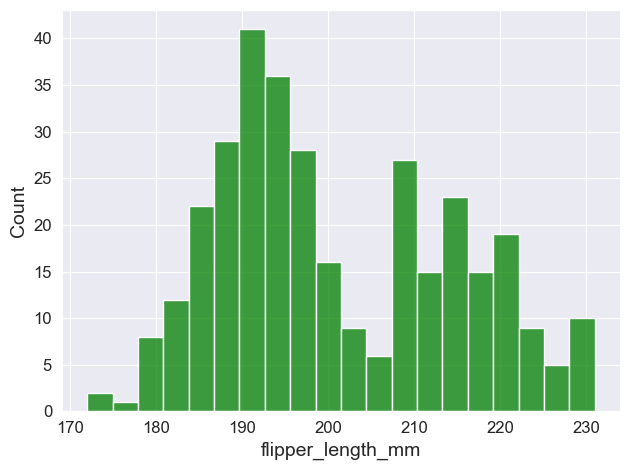

In [11]:
''' (rc) refers to runtime configuration.
It is an argument that used in matplotlib and seaborn to treat with writing in the output.
It is used to vontrol in many things like:
1- Font size    2- Axis colors     3- Font types
'''

plt.rc('xtick',            # The change will be on x_axis.
       labelsize=12        # Determine the font size to be '12'.
      )

plt.rc('ytick',            # The cahnge wil be on y_axis.
       labelsize=12        # Determine the font size to be '12'.
      )
plt.rc('axes', labelsize=14) 
sns.despine()             # A method that remove the top and teh riht oines from the figure.
sns.histplot(penguins.flipper_length_mm, color = 'g', bins = 20)
plt.tight_layout();

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

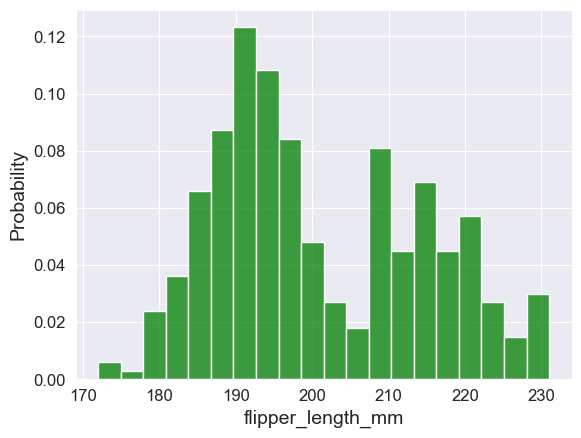

In [33]:
sns.histplot(penguins.flipper_length_mm, color = 'g', bins = 20,
             stat = 'probability'
            )


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

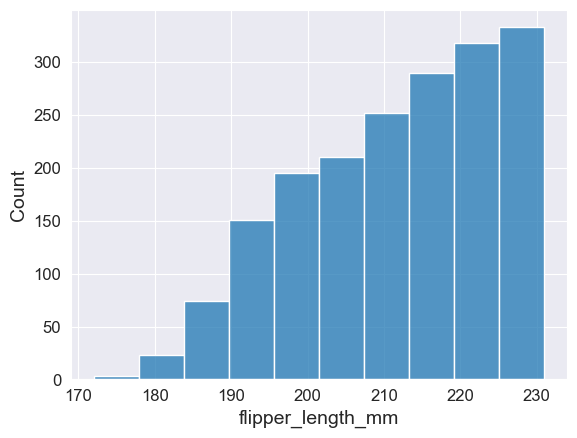

In [22]:
sns.histplot(penguins.flipper_length_mm, cumulative = True)   # We can use Cumulative function, instead of probability density function

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

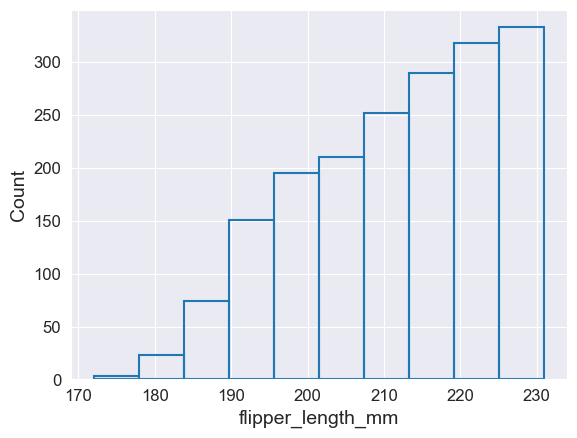

In [32]:
sns.histplot(penguins.flipper_length_mm,cumulative = True,
             fill = False,      # It is create filled polygons or regions in a plot. It is useful for hiehlighting the areas under curves.
             element = 'bars'   # Describe the graph to be as bars. It can take { 'step, bars, poly'}
            )

#### Caregorical Variables

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

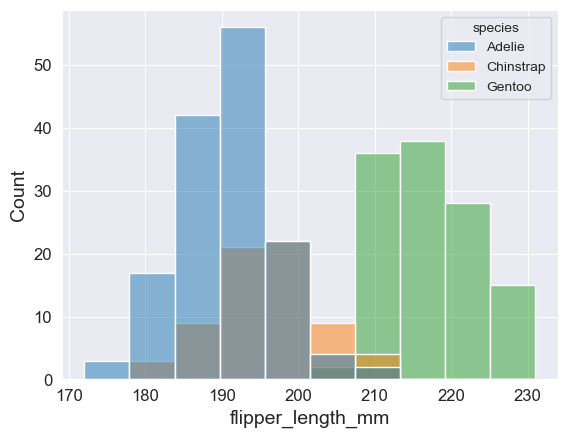

In [37]:
sns.histplot(x = 'flipper_length_mm',
             hue = 'species',   # It ussed to represent the categorical data in our dataset.
                                # The name 'species' is the name of the column that has a categorical data.
             data = penguins
            )

# The output shape has a different colour for each sinle data in the column.

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

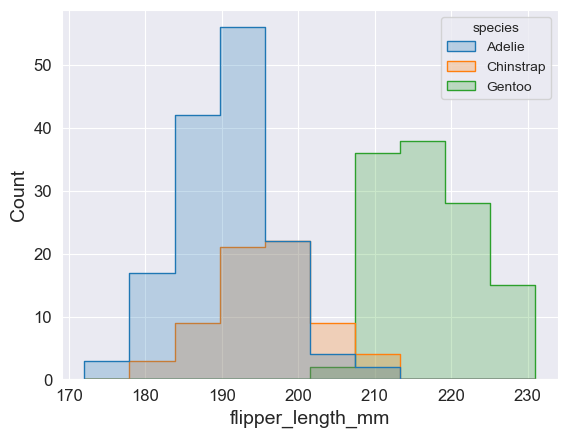

In [41]:
''' We may see the shape is overwritten, so we can use { element = 'step' }, 
and that wil show the outline of what the histogram like.
'''
sns.histplot(x = 'flipper_length_mm', hue = 'species', element = 'step', data = penguins)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

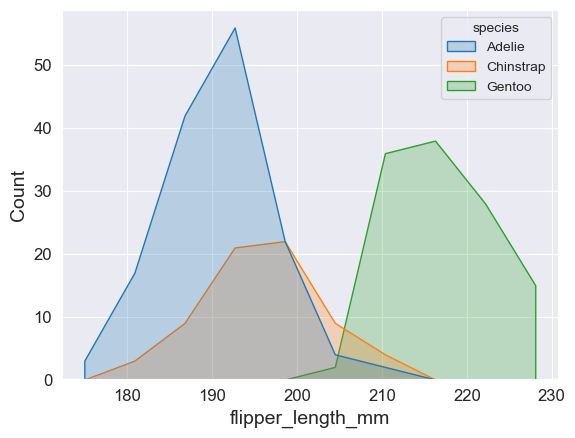

In [44]:
# element = 'poly'
sns.histplot(x = 'flipper_length_mm', hue = 'species', element = 'poly', data = penguins)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

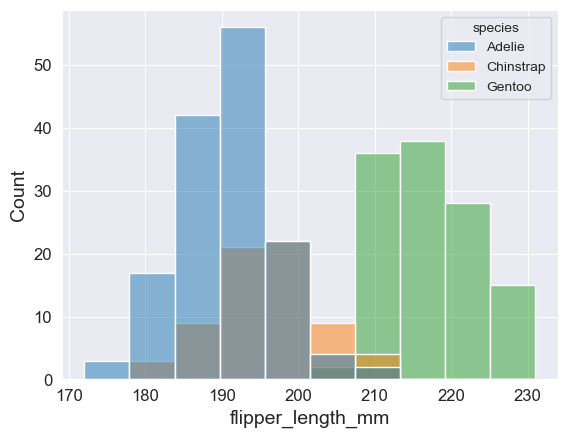

In [45]:
# element = 'bars'
sns.histplot(x = 'flipper_length_mm', hue = 'species', element = 'bars', data = penguins)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

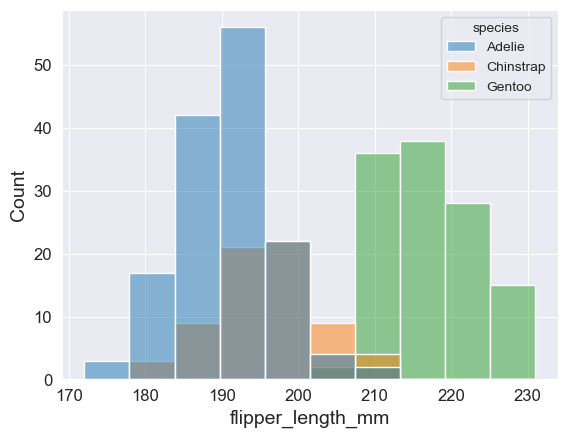

In [47]:
'''
"layer":Overlays the histogram on top of each other.
It is the default behavior.
'''
sns.histplot(x = 'flipper_length_mm', hue = 'species', data = penguins, multiple = 'layer')

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

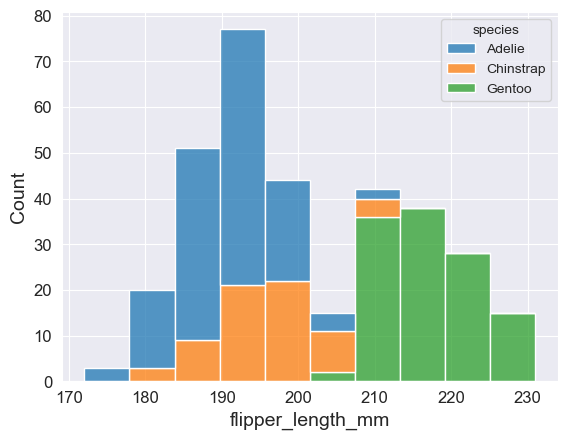

In [53]:
'''
"stack": stacks the histogram on top of each other too.
This is useful fo showing the contribution of each of the total.
'''
sns.histplot(x = 'flipper_length_mm', hue = 'species', data = penguins, multiple = 'stack')

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

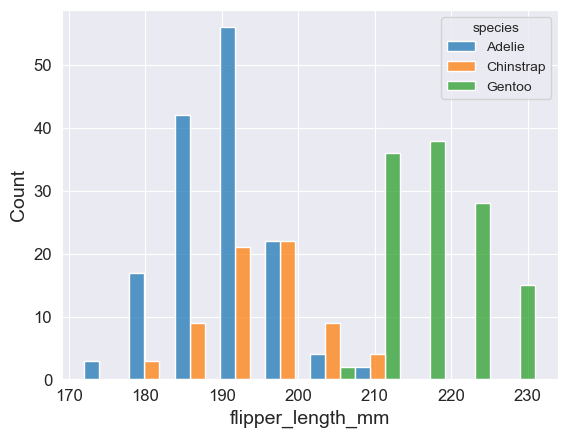

In [50]:
'''
"dodge": shift the histogram horizonrally to avoid overlap.
'''
sns.histplot(x = 'flipper_length_mm', hue = 'species', data = penguins, multiple = 'dodge')

# Note: Multipe argument is used only with categorical data to handle each subset in the data.

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

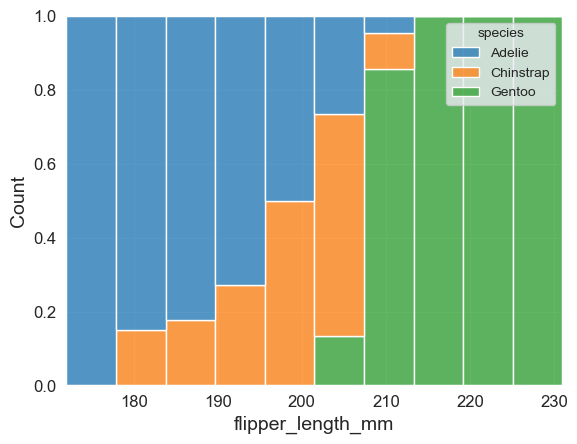

In [55]:
'''
"fill": Normalize the histogram so that the area under the curve is '1'.
'''

sns.histplot(x = 'flipper_length_mm', hue = 'species', data = penguins, multiple = 'fill')

#### Bivariate Histogram

<Axes: xlabel='species', ylabel='flipper_length_mm'>

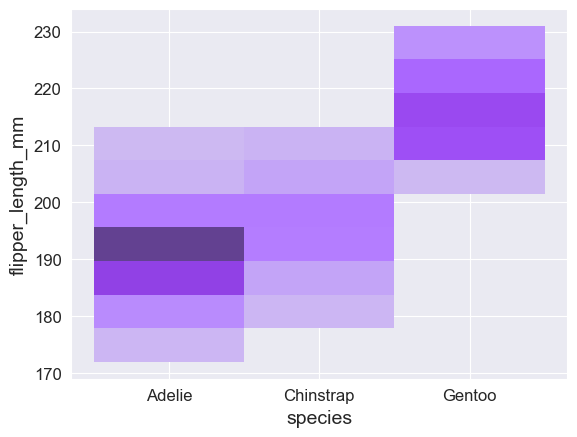

In [69]:
sns.histplot(x = 'species', y = 'flipper_length_mm', data = penguins, color = "indigo", hue = '', hue_order = (True, False))